In [ ]:
!wget https://raw.githubusercontent.com/KenoLeon/3D-Virtual-AI-Environments-Deep-Learning/5d5fdd0f9d17d109d66a820250bf10116f740405/static/dataset.tar.gz

!tar -xf dataset.tar.gz

--2024-01-31 21:15:00--  https://raw.githubusercontent.com/KenoLeon/3D-Virtual-AI-Environments-Deep-Learning/5d5fdd0f9d17d109d66a820250bf10116f740405/static/dataset.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152086 (149K) [application/octet-stream]
Saving to: ‘dataset.tar.gz’

dataset.tar.gz      100%[===================>] 148.52K  --.-KB/s    in 0.008s  

2024-01-31 21:15:01 (18.1 MB/s) - ‘dataset.tar.gz’ saved [152086/152086]



Found 104 files belonging to 2 classes.
Class Names: ['0', '1']


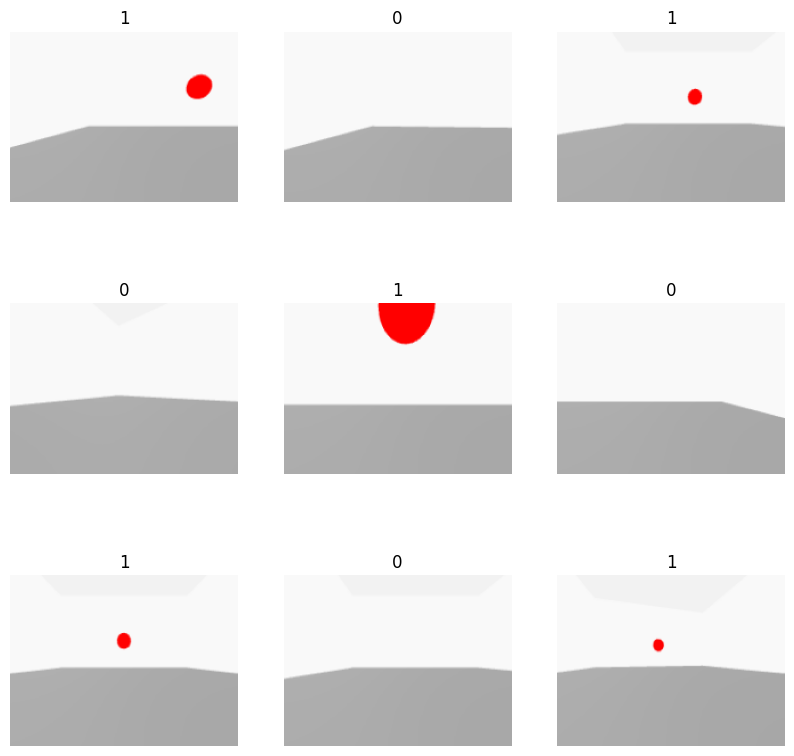

In [ ]:
# MAKE DATASET FROM FOLDERS
import tensorflow as tf

# Define the path to your dataset folder
dataset_path = '/content/dataset'

# Create a dataset using the image_dataset_from_directory function
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',  # Automatically infer labels from subdirectory names
    label_mode='categorical',  # You can change this depending on your task
    batch_size=32,  # Adjust the batch size as needed
    # image_size=(600, 800),  # Adjust the image size as needed
    image_size=(150, 200),  # Adjust the image size as needed
    shuffle=True,  # Shuffle the dataset
    seed=42  # Set a seed for reproducibility
)

# Display the class names
class_names = dataset.class_names
print("Class Names:", class_names)


# Visualize a few images from the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()



In [ ]:
# AUGMENT THE DATASET
import os
from PIL import Image, ImageEnhance, ImageOps
import random

# Define the path to your dataset folder
dataset_path = '/content/dataset'

# Define an array of labels
labels = ['0', '1']

# Loop over each label
for label in labels:
    subdirectory_path = os.path.join(dataset_path, label)

    # Perform data augmentation on images in the subdirectory
    for filename in os.listdir(subdirectory_path):
        if filename.endswith(".png"):
            image_path = os.path.join(subdirectory_path, filename)
            img = Image.open(image_path)

            # 1. Flip horizontally
            flipped_img = ImageOps.mirror(img)
            flipped_img.save(os.path.join(subdirectory_path, f'aug_flip_{filename}'))

            # 2. Random zoom
            zoom_factor = random.uniform(1, 1.5)
            zoomed_img = img.resize((int(img.width * zoom_factor), int(img.height * zoom_factor)))
            zoomed_img.save(os.path.join(subdirectory_path, f'aug_zoom_{filename}'))

            # 3. Random rotation
            rotation_angle = random.uniform(-45, 45)  # You can adjust the rotation range as needed
            rotated_img = img.rotate(rotation_angle)
            rotated_img.save(os.path.join(subdirectory_path, f'aug_rot_{filename}'))


Found 416 files belonging to 2 classes.
Epoch 1/20
20/20 [==============================] - 5s 24ms/step - loss: 307.0169 - accuracy: 0.6719 - val_loss: 0.6599 - val_accuracy: 0.9479
Epoch 2/20
20/20 [==============================] - 0s 16ms/step - loss: 0.9373 - accuracy: 0.9219 - val_loss: 0.9256 - val_accuracy: 0.9167
Epoch 3/20
20/20 [==============================] - 0s 16ms/step - loss: 0.4847 - accuracy: 0.9656 - val_loss: 0.2618 - val_accuracy: 0.9688
Epoch 4/20
20/20 [==============================] - 0s 16ms/step - loss: 0.2921 - accuracy: 0.9750 - val_loss: 0.2091 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 0s 16ms/step - loss: 0.2528 - accuracy: 0.9875 - val_loss: 0.1964 - val_accuracy: 0.9896
Epoch 6/20
20/20 [==============================] - 0s 16ms/step - loss: 0.1883 - accuracy: 0.9875 - val_loss: 0.1655 - val_accuracy: 0.9896
Epoch 7/20
20/20 [==============================] - 0s 16ms/step - loss: 0.1604 - accuracy: 0.9906 - val_loss: 0

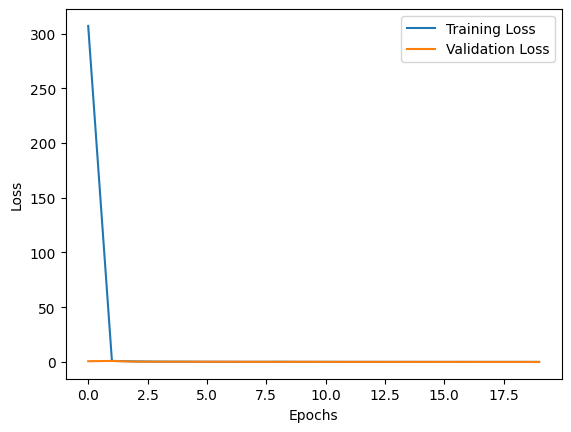

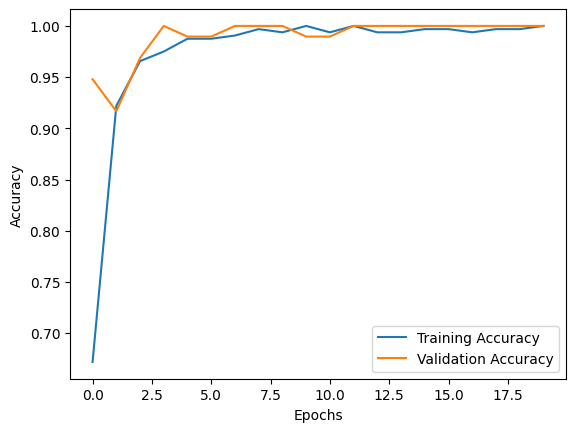

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 48, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 110592)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Sparse_categorical_crossentropy

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the path to your dataset folder
dataset_path = '/content/dataset'

# Create a dataset using the image_dataset_from_directory function
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',  # Use 'int' for integer labels
    batch_size=16,
    color_mode="rgb",
    image_size=(150, 200),
    # image_size=(600, 800),
    shuffle=True,
    seed=42,
)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Define the model

model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(150, 200, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])


# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20)

# Save the model

model.save("/content/ObjectDetectorModel")

model_json = model.to_json()
with open("/content/ObjectDetectorModel.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("/content/ObjectDetectorWeights.h5")



# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.summary()



In [ ]:
# INFERENCE BASE MODEL
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model("/content/ObjectDetectorModel")


# Load an image for inference
image_path = "/content/object_yes.png"  # Update with the path to your image
# grayscale image
# img = image.load_img(image_path, color_mode='grayscale', target_size=(600, 800))
# img = image.load_img(image_path, color_mode='rgb', target_size=(600, 800))
img = image.load_img(image_path, color_mode='rgb', target_size=(150, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


# Perform inference
probability = loaded_model.predict(img_array)[0, 0]
print("Probability:", probability)

# Display the inference result
if probability < 0.5:
    print("Object Detected")
else:
    print("No Object Detected")

1/1 [==============================] - 0s 66ms/step
Probability: 1.9817674e-14
Object Detected


In [ ]:
# MODEL OPTIMIZATION...
!pip install tensorflow-model-optimization
!pip install tensorflow_model_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 5.6 MB/s eta 0:00:00


In [ ]:
# QUANTIZE ONLY...
from tensorflow.keras.models import load_model

model = load_model('/content/ObjectDetectorModel')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('ObjectDetector.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# INFERENCE TFLITE
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
interpreter = tf.lite.Interpreter(model_path='/content/ObjectDetector.tflite')
interpreter.allocate_tensors()

# Load an image for inference
image_path = "/content/object_yes.png"  # Update with the path to your image
img = image.load_img(image_path, color_mode='rgb', target_size=(150, 200))
# img = image.load_img(image_path, color_mode='rgb', target_size=(600, 800))
img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Get input and output tensors.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

# Prepare the input data for the interpreter
input_data = np.expand_dims(img_array, axis=0)  # Same as before
# Run inference
interpreter.set_tensor(input_details["index"], input_data)
interpreter.invoke()

# output = interpreter.get_tensor(output_details[0]['index'])
output_data = interpreter.get_tensor(output_details["index"])[0]

probability_0 = output_data[0]
probability_1 = output_data[1]

print("Probability 0:", probability_0)
print("Probability 1:", probability_1)

# Display the inference result
# if probability < 0.98:
#     print("No Object Detected")
# else:
#     print("Object Dtected")

# object_no :
# Probability 0: 0.9428185
# Probability 1: 0.057181478

# object_yes :
# Probability 0: 1.0
# Probability 1: 0.0



Probability 0: 1.0
Probability 1: 0.0


In [ ]:
!gzip /content/ObjectDetector.tflite

In [ ]:
import os

def get_file_size_mb(path):
  """
  Returns and prints the size of a file in megabytes.

  Args:
      path: The path to the file.

  Returns:
      A string containing the path and size in MB.
  """
  size_in_bytes = os.path.getsize(path)
  size_in_mb = size_in_bytes / 1e6
  print(f"{path:40s} {size_in_mb:5.2f} MB")


get_file_size_mb("/content/ObjectDetectorModel.json")
get_file_size_mb("/content/ObjectDetectorWeights.h5")
get_file_size_mb("/content/ObjectDetector.tflite")
get_file_size_mb("/content/ObjectDetector.tflite.gz")


/content/ObjectDetectorModel.json         0.00 MB
/content/ObjectDetectorWeights.h5        56.72 MB
/content/ObjectDetector.tflite.gz         9.09 MB
